### This project provides an updated estimate of the number of Opportunity Youth in South King county as compared to the 2016 report used by The Seattle Times.
##### Updated by: Luluva Lakdawala, Jacob Prebys, Jason Wong

#### Data Source: American Community Survey 2017 5-year [(ACS)](https://www.census.gov/programs-surveys/acs/about.html) Public Use Microdata Survey [(PUMS)](https://www.census.gov/programs-surveys/acs/technical-documentation/pums.html).
##### The ACS provides vital information on an anual basis about America's people and places. pums provides untabulated  records of individual people and housing units. Opportunity Youth are classified as individuals within the Road Map Project region between the ages of 16-24 that are not enrolled in school or working.

###### This code will allow the notebook to re-import the source code located in src after being edited

In [1]:
%load_ext autoreload
%autoreload 2

##### This path allows the notebook to import from the src module
```
├── notebooks          <- Jupyter notebooks. Naming convention is a number (for ordering)
│   │                     followed by the topic of the notebook, e.g.
│   │                     01_data_collection_exploration.ipynb
│   └── exploratory    <- Raw, flow-of-consciousness, work-in-progress notebooks
│   └── report         <- Final summary notebook(s)
│
├── src                <- Source code for use in this project
│   ├── data           <- Scripts to download and query data
│   │   ├── sql        <- SQL scripts. Naming convention is a number (for ordering)
│   │   │                 followed by the topic of the script, e.g.
│   │   │                 03_create_pums_2017_table.sql
│   │   ├── data_collection.py
│   │   └── sql_utils.py
```

##### Import the src code by going up two parent directories.

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

##### This code downloads the data needed by loading it into an SQL database.

In [3]:
from src.data import data_collection

##### We need to import psycopg2 as it is a very convenient PostgreSQL database adapter for Python. As well as pandas and matplotlib for data manipulation and visualization.

In [4]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
DBNAME = 'opportunity_youth'

In [6]:
conn = psycopg2.connect(dbname=DBNAME)

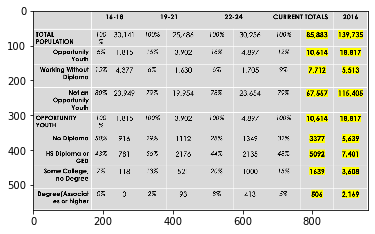

In [87]:
import matplotlib.image as mpimg
image = mpimg.imread("../../visualizations/updated_chart.png")
plt.imshow(image)
plt.show()

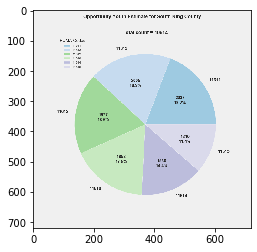

In [88]:
import matplotlib.image as mpimg
image = mpimg.imread("../../visualizations/SouthKingPie_v2.png")
plt.imshow(image)
plt.show()

### EVALUATION:
##### Our analysis shows a 41% drop in the number of Opportunity Youth. The 2017 5-year ACS PUMS dataset shows there are 10,614 OY as opposed to 18,817 from the 2016 report.

### Updated Opportunity Youth Status by Age table

In [74]:
report_2016 = pd.DataFrame({'16 to 18': [1610, 985, 179, 31, 2805], 
                            '19 to 21': [2048, 3349, 1666, 221, 7284],
                            '22 to 24': [1981, 3067, 1763, 1917, 8728],
                            'total': [5639, 7401, 3608, 2169, 18817]}, 
                            index = ['No Diploma', 'HS Diploma or GED',
                            'Some College No Degree', 
                            'Associate or Higher Degree', 'OY'])

In [76]:
report_current = pd.DataFrame({'16 to 18': [916, 781, 118, 0, 1815 ], 
                               '19 to 21': [1112, 2176, 521, 93, 3902 ],
                               '22 to 24': [1349, 2135, 1000, 413, 4897],
                               'total': [3377, 5092, 1639, 506, 10614]}, 
                               index = ['No Diploma', 'HS Diploma or GED',
                               'Some College No Degree', 
                               'Associate or Higher Degree', 'OY'])

In [80]:
combined = report_2016.join(report_current, rsuffix='_new')
combined.drop('OY', axis=0, inplace=True)
combined

,16 to 18,19 to 21,22 to 24,total,16 to 18_new,19 to 21_new,22 to 24_new,total_new
No Diploma,1610,2048,1981,5639,916,1112,1349,3377
HS Diploma or GED,985,3349,3067,7401,781,2176,2135,5092
Some College No Degree,179,1666,1763,3608,118,521,1000,1639
Associate or Higher Degree,31,221,1917,2169,0,93,413,506


### Exploratory Data Analysis explained
##### Our analysis included exploring the daata and looking for any missing values or objects that needed to be replaced or removed completely. The PUMAs that are classified as in the Road Map Project region are the puma codes 11610-11615. After querying the tables for each PUMA we were able to query for specific age groups within each individual PUMA. Once we had the updated values from the database, we updated the table 'Opportunity Youth Status by Age'. The variables we used  to collect the appropriate data were:
#### PUMA- Puma Code
#### AGEP- Age
#### ESR- Employment Status Code
#### COW- Class of Worker
#### SCH- School Enrollment Status
#### SCHL- Educational Attainment
#### We were able to restrict the age group from 16-24 in our queries but when it came to school and employment, things got a bit more complicated as there were a few different variables for them both.

In [32]:
from src.data import sql_utils

In [73]:
puma_info_query = sql_utils.open_sql_script('14_select_oy_all_pumas.sql')
puma_query = pd.read_sql(puma_info_query, conn)
puma_query.head(2)

,serialno,agep,pwgtp,sex,schl,puma,puma_name
0,2015000895429,24.0,24.0,2,21,11612,"King County (Far Southwest)--Federal Way, Des ..."
1,2017000914886,24.0,4.0,2,16,11614,King County (Southwest)--Auburn City & Lakelan...


### OY count by PUMA

In [72]:
pumas_oy_count_query = sql_utils.open_sql_script('15_get_oy_by_puma.sql')
puma_oy_count = pd.read_sql(pumas_oy_count_query, conn)
puma_oy_count.head(2)

,oy_count,puma_name
0,1853.0,"King County (Central)--Renton City, Fairwood, ..."
1,1977.0,"King County (Far Southwest)--Federal Way, Des ..."


#### Total OY 

In [50]:
total_oy = puma_oy_count.sum()
total_oy

oy_count                                                 10614
puma_name    King County (Central)--Renton City, Fairwood, ...
dtype: object

##### Cities in each OY PUMA

In [59]:
total_oy.values

array([10614.0,
       'King County (Central)--Renton City, Fairwood, Bryn Mawr & Skyway                                                                                                                                                                                                                                                                                                                                                                                                                                                    King County (Far Southwest)--Federal Way, Des Moines Cities & Vashon Island                                                                                                                                                                                                                                                                                                                                                                                                                 

#### Selecting the number of OY in each age group(16-18 | 19-21 | 22-24)

In [64]:
oy_by_age_16query = sql_utils.open_sql_script('16_get_oy_age_16_18.sql')
oy_by_age_16_18= pd.read_sql(oy_by_age_16query, conn)
oy_by_age_16_18.head(2)

,oy_count,puma
0,339.0,11610
1,246.0,11611


### 1,815 total OY in age group 16-18
### 3,902 total OY in age group 19-21
### 4,897 total OY in age group 22-24

#### A few examples of the codes we ran: 

In [62]:
oy_by_age_16_18['oy_count'].sum()

1815.0

In [65]:
oy_by_age_19query = sql_utils.open_sql_script('17_get_oy_age_19_21.sql')
oy_by_age_19_21 = pd.read_sql(oy_by_age_19query, conn)
oy_by_age_19_21.head(2)

,oy_count,puma
0,615.0,11610
1,746.0,11611


In [66]:
oy_by_age_19_21['oy_count'].sum()

3902.0

In [69]:
oy_by_age_22query = sql_utils.open_sql_script('18_get_oy_age_22_24.sql')
oy_by_age_22_24 = pd.read_sql(oy_by_age_22query, conn)
oy_by_age_22_24.head(2)

,oy_count,puma
0,899.0,11610
1,1046.0,11611


In [70]:
oy_by_age_22_24['oy_count'].sum()

4897.0

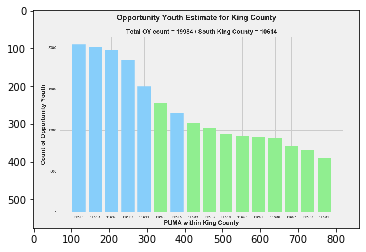

In [19]:
import matplotlib.image as mpimg
image = mpimg.imread("../../visualizations/oy_king.png")
plt.imshow(image)
plt.show()

#### We can see from the graph above that the number of OY are much greater in the South King County as opposed to the rest of King County.

#### We chose to look at cognitive difficulty, and if an OY has recently given birth as factors that could affect the results.

### Cognitive difficulty

In [82]:
get_cog_diff_query = sql_utils.open_sql_script('19_get_cog_diff.sql')
get_cog_diff = pd.read_sql(get_cog_diff_query, conn)
get_cog_diff['oy_count'].sum()

1182.0

There are 1,182 OY that have cognitive difficulty

### Given birth in the past 12 months and still using the same OY parameters

In [86]:
get_birth_stat_query = sql_utils.open_sql_script('20_get_birth_stat.sql')
get_birth_stat = pd.read_sql(get_birth_stat_query, conn)
given_birth = get_birth_stat['oy_count'].sum()
given_birth

1028.0

##### 1028 OY out of 5,665 female OY have given birth within the past year.

### Conclusion

#### The number of OY in the Road Map Project region have dropped but no significantly since the 2016 report. This demographic is most concentrated in the south areas of King County. The number of OY that currently have an Associates Degree or higher dropped most significantly from 1,917 to 506 OY. PUMA 11614, Auburn city area have more younger OYs when compared to the rest of the PUMAs within South King county.
#### This project was of considerable importance for many reasons. Each Opportunity Youth costs an estimated $704,020.00 of lost earnings over their lifetime. The Opportunity Youths' contributions to the workforce are undervalued due to socioeconomic barriers such as racial bias and lack of exposure to career focused learning opportunities. 

## Citations

<sup>1</sup> Yohalem, N., Cooley, S. 2016. “Opportunity Youth in the Road Map Project Region”. Community Center for Education Results. Available at: https://bit.ly/2P2XRF3.

<sup>2</sup> Anderson, T., Braga, B., Derrick-Mills, T., Dodkowitz, A., Peters, E., Runes, C., and Winkler, M. 2019. “New Insights into the Back on Track Model’s Effects on Opportunity Youth Outcomes”. Urban Institute. Available at: https://bit.ly/2BuCLr1.

<sup>3</sup> Seattle Region Partnership. 2016. “King County Opportunity Youth Overview: Demographics of opportunity youth and systemic barriers to employment”. Available at: https://bit.ly/2oRGz37.

<sup>4</sup> Morton, N. 2019. “Nearly 19,000 youth in King County are neither working nor in school. How one Seattle nonprofit is changing that.” The Seattle Times. Available at: https://bit.ly/2W5EufR.